### Import Packages

In [1]:
from omero.gateway import BlitzGateway
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2

### OMERO Credentials

In [2]:
HOST = 'outreach.openmicroscopy.org'
USERNAME = ''
PASSWORD = ''
PORT = 4064
conn = BlitzGateway(USERNAME, PASSWORD, host=HOST, port=PORT)
conn.connect()

True

### OMERO Image ID

In [3]:
image_id = 9397

### Print Image Name

In [4]:
image = conn.getObject("Image", image_id)
print image.getName(), image.getDescription()

POS218.pattern 


### Split channel view for an individual plane

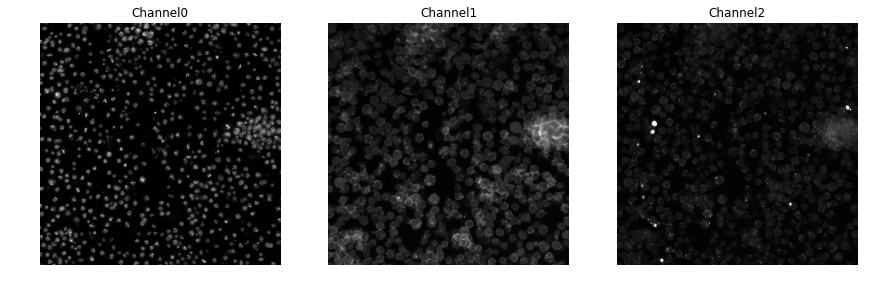

In [21]:
%matplotlib inline
pixels = image.getPrimaryPixels()
channels = image.getChannels()
plt.figure(figsize=(25, 20))
size_c = image.getSizeC()
for idx in range(0,size_c):
    plt.subplot(1,5,idx+1)
    image_plane = pixels.getPlane(0, idx, 0)
    plt.imshow(image_plane, cmap='gray')
    plt.axis('off')
    plt.title('Channel' + str(idx))

### Tophat Filter and display the images

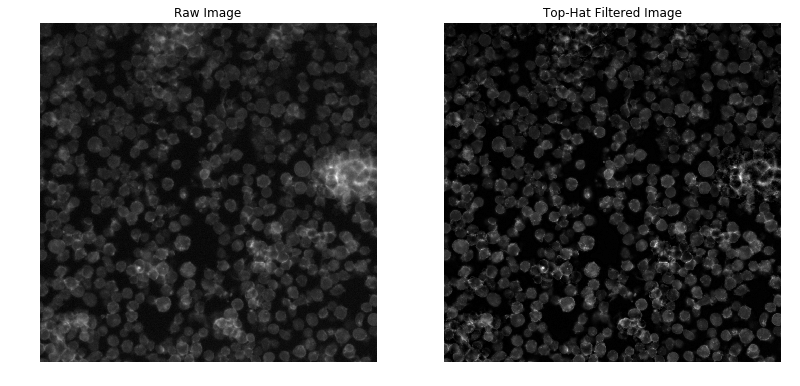

In [25]:
%matplotlib inline
from skimage.morphology import disk, square
from skimage.morphology import erosion, dilation, opening, closing, white_tophat

image_plane = pixels.getPlane(0, 1, 0)

selem = disk(25)
w_tophat = white_tophat(image_plane, selem)

plt.figure(figsize=(35, 35))
plt.subplot(1,5,1)
plt.imshow(convolve_with_psf, cmap='gray')
plt.axis('off')
plt.title('Raw Image')

plt.subplot(1,5,2)
plt.imshow(w_tophat, cmap='gray')
plt.axis('off')
plt.title('Top-Hat Filtered Image')